In [1]:
import os
from enum import auto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cmcrameri import cm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Boxplots --- Figrue 4-c

In [ ]:
## Old results
Data_evap_old = pd.read_csv(r"...\evap_parameters_juntos.csv", 
                                delimiter = ",")

In [ ]:
# Keep just calculated and predicted evaporations
Data_evap_old = Data_evap_old.drop(['Hotplate', 'Last Syringe Mass (g)',
                            'Last Solution Mass (g)', 'Last Total Mass (g)',
                            'All Deposited Crystals (g)', 'Total Infusion (g)', 'Total Evaporation (g)', 
                            'Estimated Last Concentration (wt.%)', 'Hotplate Temperature (oC)',
                            'Syringe Diameter (mm)', 'Imaging Width (pixel)',
                            'Imaging Height (pixel)', 'Shot Interval (sec)', 'Mask Radius (pixel)',
                            'Scale (pixel/mm2)', 'B Bottom Threshold', 'G Bottom Threshold',
                            'R Bottom Threshold', 'B Top Threshold', 'G Top Threshold',
                            'R Top Threshold', 'L Smoothing Parameters 1',
                            'L Smoothing Parameters 2', 'G Smoothing Parameters 1',
                            'G Smoothing Parameters 2',
                            'source', 'Crystal Size A (mm)', 'Crystal Size B (mm)', 'Crystal Size C (mm)', 
                            'Kp', 'Ki', 'Kd',
                            'Initial Infusion Rate (mL/h)', 
                            'Initial Syringe Mass (g)', 'Initial Total Mass (g)',
                            'Initial Concentration (wt.%)',
                            'Seed Size A (mm)', 'Seed Size B (mm)', 'Seed Size C (mm)', 
                            'Initial Solution Mass (g)', 'Room Temperature (oC)', 'Humidity (RH%)',
                            'Ideal Growth Rate (mm/h)', 'Parameters'], axis=1)

In [ ]:
Data_evap_old = Data_evap_old.dropna()

Evaporation rates - new results

In [ ]:
#### Results of predicted and calculated - averages - evaporation rates
Pred_evap_rate_T = [2.53, 2.69, 2.65, 2.71, 2.57, 2.70, 2.83, 2.82, 2.93, 2.73, 2.7, 2.65, 2.55, 2.67, 2.77, 2.73, 2.75, 2.74, 2.68, 2.76, 2.76, 2.69] 
Calc_evap_rate_T = [2.28, 2.49, 2.24, 2.53, 2.33, 2.28, 2.40, 2.13, 2.74, 2.28, 2.32, 2.28, 2.39, 1.99, 2.34, 2.33, 2.37, 2.42, 2.58, 2.92, 2.19, 2.51]

Pred_T = pd.DataFrame({
    'Pred_evap_rate_T': Pred_evap_rate_T,
    'Calc_evap_rate_T': Calc_evap_rate_T
})

# Mean Squared Error (MSE) e Root Mean Squared Error (RMSE) 
mae = mean_absolute_error(Pred_T['Pred_evap_rate_T'], Pred_T['Calc_evap_rate_T'])
mse = mean_squared_error(Pred_T['Pred_evap_rate_T'], Pred_T['Calc_evap_rate_T'])
rmse = np.sqrt(mse)
r2 = r2_score(Pred_T['Pred_evap_rate_T'], Pred_T['Calc_evap_rate_T'])
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")

Boxplot

In [ ]:
# Rename columns --- two different dataframes
Pred_T = Pred_T.rename(columns={'Pred_evap_rate_T':'Pred evap',
                                'Calc_evap_rate_T':'Calc evap'})
Data_evap_old = Data_evap_old.rename(columns={'Evaporation Rate (g/h)':'Prev Evap'})

# Colors
colors = cm.vik
color_1 = 0.85
color_one = colors(color_1)
color_2 = 0.1
color_two = colors(color_2)
color_3 = 0.6
color_three = colors(color_3)
color_4 = 0.95
color_four = colors(color_4)
median_color_index = 0.33
median_color = colors(median_color_index)


# Select columns
column_pred_1 = Pred_T['Pred evap']
column_pred_2 = Pred_T['Calc evap']
column_evap_old = Data_evap_old['Prev Evap']

# Combined dataframe - i'm using columns from two dataframes
combined_df = pd.DataFrame({
    'Evaporation Rate': pd.concat([column_pred_1, column_pred_2, column_evap_old], ignore_index=True),
    'Category': ['Pred evap'] * len(column_pred_1) + 
                ['Calc evap'] * len(column_pred_2) + 
                ['Prev Evap'] * len(column_evap_old)
})

save_path = r'...\Paper ML crystal\Figuras'

if not os.path.exists(save_path):
    os.makedirs(save_path)

# Create plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create boxplot
sns.boxplot(x='Category', y='Evaporation Rate', data=combined_df,
            medianprops={'color': median_color, 'linewidth': 1},
            ax=ax1, palette=[color_two, color_three, color_one, ])

# Add stripplot -- add the dots on top of boxplot
sns.stripplot(x='Category', y='Evaporation Rate', data=combined_df,
              color=color_four, alpha=0.6, size=3, ax=ax1)

## Adjusting figure set
ax1.set_ylabel('Evaporation Rate (g/h)', color='black', fontsize=20)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax1.spines['left'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['top'].set_linewidth(1)

plt.show()

# Save figure
fig.set_dpi(500)
fig.savefig(os.path.join(save_path, 'Evaporation_Rate_boxplot.png'), dpi=500, bbox_inches='tight', format='png', transparent=True)

plt.close(fig)


Growth rates  - Figures 4 - d,e

In [ ]:
## This is file is for all growth rates - 251 experiments - to calculate the metrics in Figure 4 - d
Data_growth = pd.read_csv(r"...\average_Y_S_all.csv", 
                                delimiter = ",")

Data_growth = Data_growth.drop(['Hotplate', 'Last Syringe Mass (g)',
                            'Last Solution Mass (g)', 'Last Total Mass (g)',
                            'All Deposited Crystals (g)', 'Total Infusion (g)', 'Total Evaporation (g)', 
                            'Estimated Last Concentration (wt.%)', 'Hotplate Temperature (oC)',
                            'Syringe Diameter (mm)', 'Imaging Width (pixel)',
                            'Imaging Height (pixel)', 'Shot Interval (sec)', 'Mask Radius (pixel)',
                            'Scale (pixel/mm2)', 'B Bottom Threshold', 'G Bottom Threshold',
                            'R Bottom Threshold', 'B Top Threshold', 'G Top Threshold',
                            'R Top Threshold', 'L Smoothing Parameters 1',
                            'L Smoothing Parameters 2', 'G Smoothing Parameters 1',
                            'G Smoothing Parameters 2',
                            'source', 'Crystal Size A (mm)', 'Crystal Size B (mm)', 'Crystal Size C (mm)', 
                            'Kp', 'Ki', 'Kd',
                            'Initial Infusion Rate (mL/h)', 
                            'Initial Syringe Mass (g)', 'Initial Total Mass (g)',
                            'Initial Concentration (wt.%)', 'Growth Rate (mm/h)',
                            'Seed Size A (mm)', 'Seed Size B (mm)', 'Seed Size C (mm)', 
                            'Initial Solution Mass (g)', 'Room Temperature (oC)', 'Humidity (RH%)',
                            'Parameters', 'Infusion Rate (mL/h)', 'Total Infusion (mL)',
                            'Number of Crystals', 'Length (mm)', 'Smoothed Length (mm)',
                            'Area (mm2)', 'Est-Mass (g)', 'Smoothed Growth Rate (mm/h)',
                            'e(t)', 'de/dt', 'integral e', 'Estimated Concentration (wt.%)', 'source.1',
                            'Estimated Evaporation Rate (g/h)', 'Evaporation Rate (g/h)',
                            'Unnamed: 0', 'Time (h)'], axis=1)

Data_growth = Data_growth.dropna()

# Mean Squared Error (MSE) e Root Mean Squared Error (RMSE)
mae = mean_absolute_error(Data_growth['Ideal Growth Rate (mm/h)'], Data_growth['average_Growth Rate (mm/h)'])
mse = mean_squared_error(Data_growth['Ideal Growth Rate (mm/h)'], Data_growth['average_Growth Rate (mm/h)'])
rmse = np.sqrt(mse)
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")

In [ ]:
## This file contains the 73 results used in the previous paper, for comparison with the new experiments
SSE = pd.read_excel(r"...\Tables_for_paper.xlsx", 
                                sheet_name= 'steady state error')

In [ ]:
colors = cm.vik
color_1 = 0.87
color_one = colors(color_1)
color_2 = 0.1
color_two = colors(color_2)
color_3 = 0.7
color_three = colors(color_3)

save_path = r'...\Paper ML crystal\Figures'

# Create plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot histograms
ax1.hist(SSE['Steady-State Error'], bins=25, alpha=0.9, color=color_one, label='Previous growths, N = 73') 
ax1.hist(SSE['New_one_pred'], bins=25, alpha=1, color=color_three, label='One evap pred - ML, N = 7') 
ax1.hist(SSE['New'], bins=10, alpha=0.85, color=color_two, label='Many evap pred - ML, N = 20') 

# Adjust figure set
ax1.set_ylabel('Count', fontsize=20)
ax1.set_xlabel('Steady state error', fontsize=20)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax1.spines['left'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['top'].set_linewidth(1)

ax1.legend(fontsize=12, frameon=False)

fig.set_dpi(500)
fig.savefig(os.path.join(save_path, 'Growth_Rates_Errors_Histogram.png'), dpi=500, bbox_inches='tight', format='png', transparent=True)

plt.show()

plt.close(fig)


Rocking curves - Histogram 4f

In [2]:
## This file contains the 73 results used in the previous paper, for comparison with the new experiments
RC = pd.read_excel(r"C:\Users\taty_\OneDrive\Área de Trabalho\Doutorado\UVIC\Single crystal perovskite\ML evaporação\Paper ML crystal\Tables_for_paper.xlsx", 
                                sheet_name= 'RC')

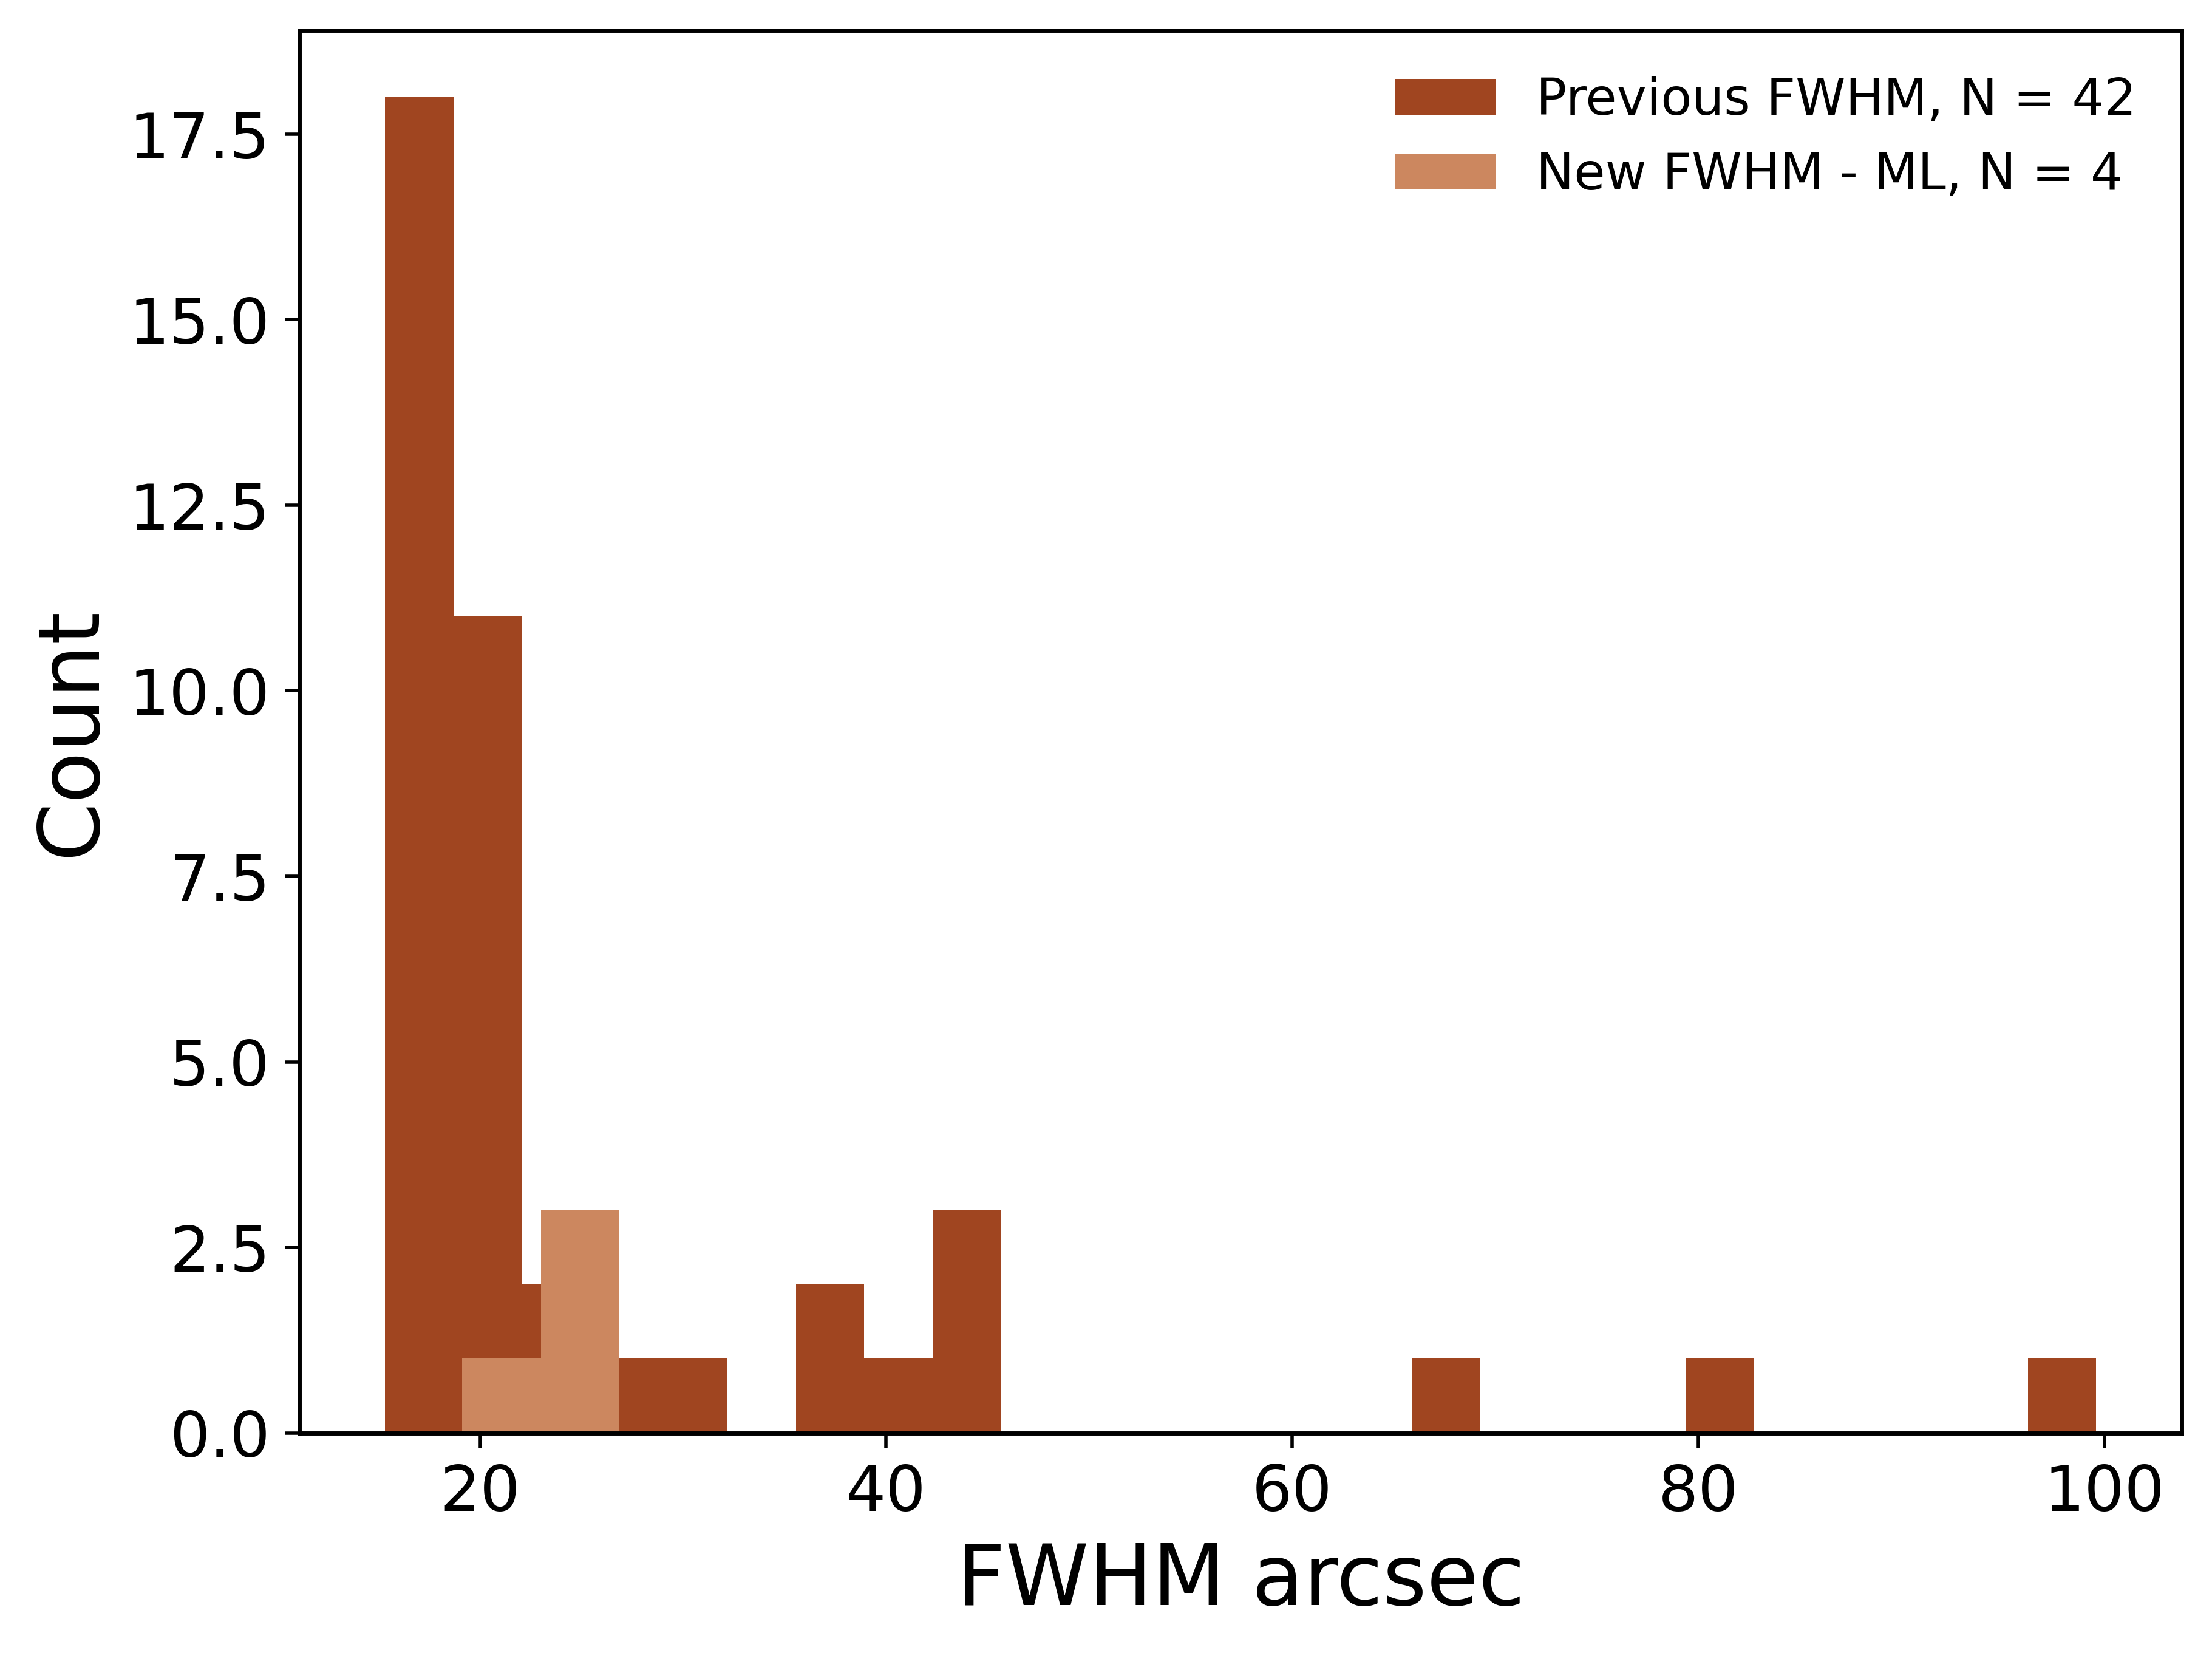

In [6]:
colors = cm.vik
color_1 = 0.87
color_one = colors(color_1)
color_2 = 0.1
color_two = colors(color_2)
color_3 = 0.7
color_three = colors(color_3)

save_path = r'C:\Users\taty_\OneDrive\Área de Trabalho\Doutorado\UVIC\Single crystal perovskite\ML evaporação\Paper ML crystal\Figures'

# Create plots
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot histograms
ax1.hist(RC['Previous'], bins=25, alpha=0.9, color=color_one, label='Previous FWHM, N = 42') 
ax1.hist(RC['New'], bins=2, alpha=1, color=color_three, label='New FWHM - ML, N = 4')

# Adjust figure set
ax1.set_ylabel('Count', fontsize=20)
ax1.set_xlabel('FWHM arcsec', fontsize=20)
ax1.tick_params(axis='y', labelsize=15)
ax1.tick_params(axis='x', labelsize=15)

ax1.spines['left'].set_linewidth(1)
ax1.spines['right'].set_linewidth(1)
ax1.spines['bottom'].set_linewidth(1)
ax1.spines['top'].set_linewidth(1)

ax1.legend(fontsize=12, frameon=False)

fig.set_dpi(500)
fig.savefig(os.path.join(save_path, 'FWHM_histogram.png'), dpi=500, bbox_inches='tight', format='png', transparent=True)

plt.show()

plt.close(fig)
